#Laboratoire d'introduction au filtrage - Corrigé

> Cours NSC-2006, année 2015

> Méthodes quantitatives en neurosciences 

> Pierre Bellec, Yassine Ben Haj Ali

## Objectifs:
Ce laboratoire a pour but de vous initier au filtrage de signaux temporels avec Matlab. Nous allons travailler avec un signal simulé qui contient plusieurs sources, une d'intérêt et d'autres qui sont du bruit. 
 - Nous allons tout d'abord nous familiariser avec les différentes sources de signal, en temps et en fréquence. 
 - Nous allons ensuite chercher un filtrage qui permette d'éliminer le bruit sans altérer de maniére forte le signal. 
 - Enfin, nous évaluerons l'impact d'une perte de résolution temporelle sur notre capacité à débruiter le signal, lié au phénomène de repliement de fréquences (aliasing). 

Pour réaliser ce laboratoire, il est nécessaire de récupérer la
ressource suivante sur [studium](https://studium.umontreal.ca/):

-   labo7_filtrage.zip: cette archive contient plusieurs codes et jeux de données. SVP décompressez l'archive et copiez les fichiers dans votre répertoire de travail Matlab.

De nombreuses portions du labo consiste à modifier un code réalisé dans une autre question. Il est donc fortement conseillé d'ouvrir un nouveau fichier dans l'éditeur matlab, et d'exécuter le code depuis l'éditeur, de façon à pouvoir copier des paragraphes de code rapidement. Ne pas tenir compte et ne pas exécuter cette partie du code:

In [1]:
%matplotlib inline
from pymatbridge import Octave
octave = Octave()
octave.start()
%load_ext pymatbridge

Starting Octave on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
..Octave started and connected!
Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
.MATLAB started and connected!


## Section 1: Exemple de signaux, temps et fréquence

#### 1. Commençons par générer un signal d'intérêt:

In [2]:
%%matlab

%% Définition du signal d'intêret
% fréquence du signal
freq = 1;  
% on crée des blocs off/on de 15 secondes
bloc = repmat([zeros(1,15*freq) ones(1,15*freq)],[1 10]); 
% les temps d'acquisition
ech = (0:(1/freq):(length(bloc)/freq)-(1/freq)); 
% ce paramètre fixe le pic de la réponse hémodynamique
pic = 5; 
% noyau de réponse hémodynamique
noyau = [linspace(0,1,(pic*freq)+1) linspace(1,-0.3,(pic*freq)/2) linspace(-0.3,0,(pic*freq)/2)]; 
noyau = [zeros(1,length(noyau)-1) noyau]; 
% normalisation du noyau
noyau = noyau/sum(abs(noyau)); 
% convolution du bloc avec le noyau
signal = conv(bloc,noyau,'same'); 
% on fixe la moyenne de la réponse à zéro
signal = signal - mean(signal); 

Représentez `noyau` et `signal` en temps, à l'aide de la commande `plot`. Utiliser les temps d'acquisition corrects, et labéliser les axes (xlabel, ylabel). Comment est généré `signal`? reconnaissez vous le processus employé? Est ce que le signal est périodique? si oui, quelle est sa période? Peut-on trouver la réponse dans le code? 

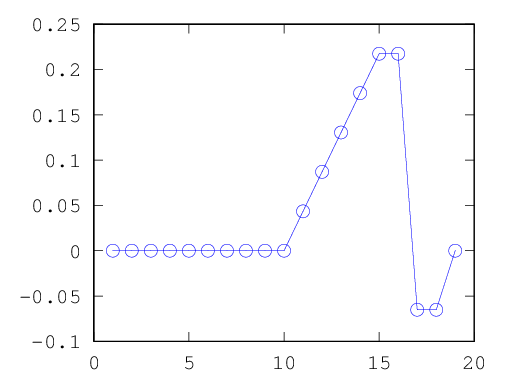

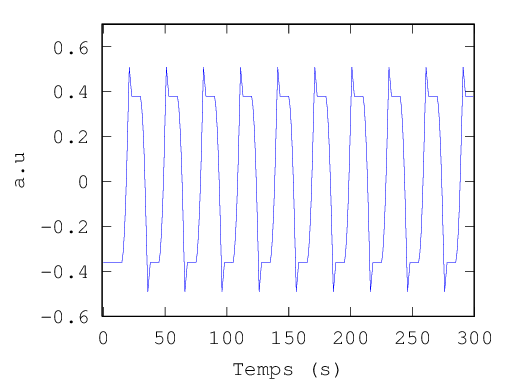

In [3]:
%%matlab
%% représentation en temps
% Nouvelle figure
figure
% On commence par tracer le noyau
plot(noyau,'-bo')
% Nouvelle figure
figure
% On trace le signal, en utilisant ech pour spécifier les échantillons temporels
plot(ech,signal)
% Les fonctions xlim et ylim permettent d'ajuster les valeurs min/max des axes
xlim([-1 max(ech)+1])
ylim([-0.6 0.7])
% Les fonctions xlabel et ylabel permettent de labéliser les axes
xlabel('Temps (s)')
ylabel('a.u')

A partir du graphe du noyau, on reconnait la fonction de réponse hémodynamique utilisée lors du laboratoire sur la convolution. Le signal est généré par convolution du noyau avec un vecteur `bloc` (ligne 18 du bloc de code initial). On voit que bloc est créé en assemblant deux vecteurs de 15 zéros et de 15 uns (ligne 7). Le signal est donc périodique. Comme la fréquence d'acquisition est de 1 Hz (ligne 9 définissant les échantillons temporels, on voit un pas de 1/freq, avec freq=1, ligne 5), la période du signal est de 30 secondes, soit une fréquence de 0.033Hz. On peut confirmer cela visuellement sur le graphe.

#### 2. Représenter le contenu fréquentiel de `signal` avec la commande `Analyse_Frequence_Puissance`. 

Utilisez la commande `ylim` pour ajuster les limites de l'axe y et pouvoir bien observer le signal. Notez que l'axe y (puissance) est en échelle log (dB). Quelles sont les fréquences principales contenues dans le signal? Etait-ce attendu?

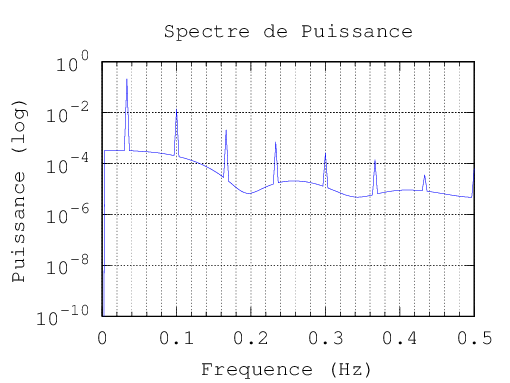

In [4]:
%%matlab
%% représentation en fréquences
% Nouvelle figure
figure
% La fonction utilise le signal comme premier argument, et les échantillons temporels comme deuxième
Analyse_Frequence_Puissance(signal,ech);
% On ajuste l'échelle de l'axe y.
ylim([10^(-10) 1])

Comme attendu, étant donné le caractère périodique de période 30s du signal, la fréquence principale est de 0.033 Hz. Les pics suivants sont situés à 0.1 Hz et 0.166 Hz.

#### 3. Répétez les questions 1.1 et 1.2 avec un bruit dit blanc, généré ci dessous.

In [5]:
%%matlab

%% définition du bruit blanc
bruit = 0.05*randn(size(signal));

Pourquoi est ce que ce bruit porte ce nom?

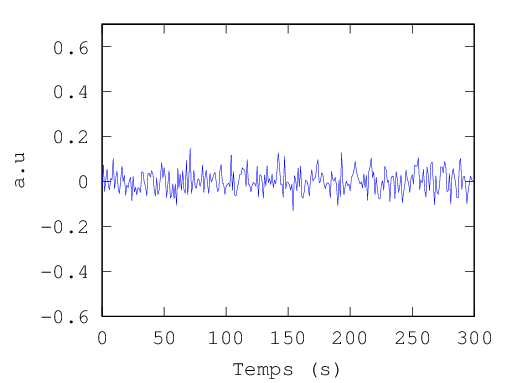

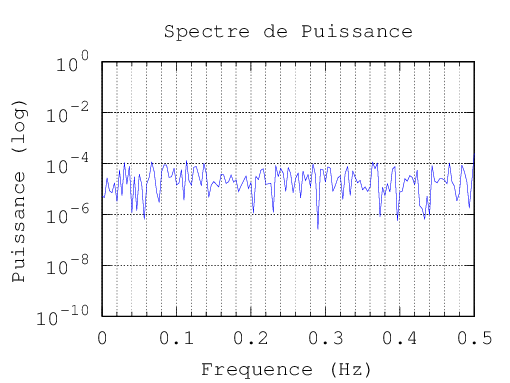

In [6]:
%%matlab
% Ce code n'est pas commenté, car essentiellement identique
% à ceux présentés en question 1.1. et 1.2.
%% représentation en temps
figure
plot(ech,bruit)
ylim([-0.6 0.7])
xlabel('Temps (s)')
ylabel('a.u')

%% représentation en fréquences
figure
Analyse_Frequence_Puissance(bruit,ech);
ylim([10^(-10) 1])

Le vecteur `bruit` est généré à l'aide de la fonction `randn`, qui est un générateur pseudo-aléatoires d'échantillons indépendants Gaussiens. Le spectre de puissance représente l'amplitude de la contribution de chaque fréquence au signal. On peut également décomposer une couleur en fréquences. Quand toutes les fréquences sont présentes, et en proportion similaire, on obtient du blanc. Le bruit Gaussien a un spectre de puissance plat (hormis de petites variations aléatoires), ce qui lui vaut son surnom de bruit blanc.

#### 4. Bruit respiratoire.
Répétez les les questions 1.1 et 1.2 avec un bruit dit respiratoire, généré ci dessous. 

In [7]:
%%matlab

%% définition du signal de respiration
% fréquence de la respiration
freq_resp = 0.3; 
% un modéle simple (cosinus) des fluctuations liées à la respiration
resp = cos(2*pi*freq_resp*ech/freq); 
% fréquence de modulation lente de l'amplitude respiratoire
freq_mod = 0.01; 
% modulation de l'amplitude du signal lié à la respiration
resp = resp.*(ones(size(resp))-0.1*cos(2*pi*freq_mod*ech/freq)); 
% on force une moyenne nulle, et une amplitude max de 0.1
resp = 0.1*(resp-mean(resp)); 

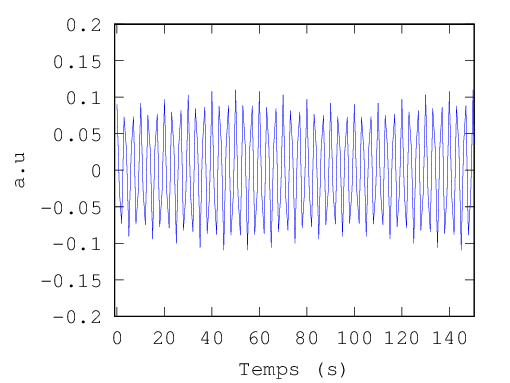

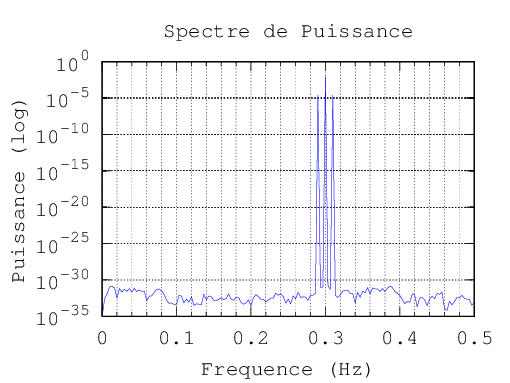

In [8]:
%%matlab

% Ce code n'est pas commenté, car essentiellement identique
% à ceux présentés en question 1.1. et 1.2.

%% représentation en temps
figure
plot(ech,resp)
xlim([-1 max(ech)/2+1])
xlabel('Temps (s)')
ylabel('a.u')

%% représentation en fréquences
figure
[ech_f,signal_f,signal_af,signal_pu] = Analyse_Frequence_Puissance(resp,ech);
set(gca,'yscale','log');
ylim([10^(-35) 1])

Est ce une simulation raisonnable de variations liées à la respiration? pourquoi?

On voit que ce signal est essentiellement composé de fréquences autour de 0.3Hz. Cela était déjà apparent avec l'introduction d'un cosinus de fréquence 0.3Hz dans la génération (ligne 7). L'amplitude de ce cosinus est elle-même modulée par un autre cosinus, plus lent (ligne 11). D'aprés wikipedia, un adulte respire de 16 à 20 fois par minutes, soit une fréquence de 0.26 à 0.33Hz (en se ramenant en battements par secondes). Cette simulation utilise donc une fréquence raisonnable pour simuler la respiration. 

#### 5. Ligne de base.
Répétez les les questions 1.1 et 1.2 avec une dérive de la ligne de base, telle que générée ci dessous.

In [9]:
%%matlab

%% définition de la ligne de base
base = 0.1*(ech-mean(ech))/mean(ech);

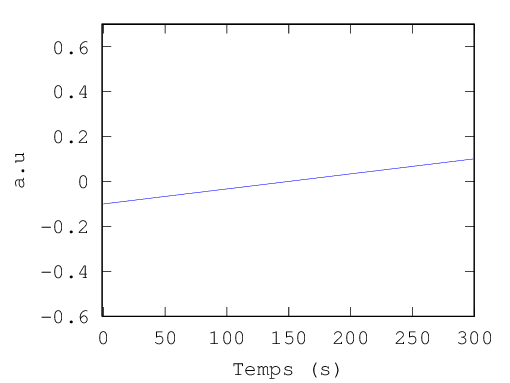

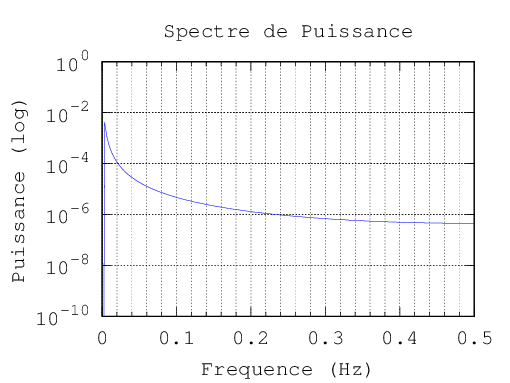

In [12]:
%%matlab

% Ce code n'est pas commenté, car essentiellement identique
% à ceux présentés en question 1.1. et 1.2.

%% représentation en temps
figure
plot(ech,base)
xlim([-1 max(ech)+1])
ylim([-0.6 0.7])
xlabel('Temps (s)')
ylabel('a.u')

%% représentation en fréquence
figure
[ech_f,base_f,base_af,base_pu] = Analyse_Frequence_Puissance(base,ech);
ylim([10^(-10) 1])

Le vecteur `base` est une fonction linéaire du temps (ligne 4). En représentation fréquentielle, il s'agit d'un signal essentiellement basse fréquence. 

#### 6. Mélange de signaux. 
On va maintenant mélanger nos différentes signaux, tel qu'indiqué ci-dessous. Représentez les trois mélanges en temps et en fréquence, superposé au signal d'intérêt sans aucun bruit (variable `signal`). Pouvez-vous reconnaitre la contribution de chaque source dans le mélange fréquentiel? Est ce que les puissances de fréquences s'additionnent systématiquement?

In [13]:
%%matlab

%% Mélanges de signaux
y_sr   = signal + resp;
y_srb  = signal + resp + bruit;
y_srbb = signal + resp + bruit + base;

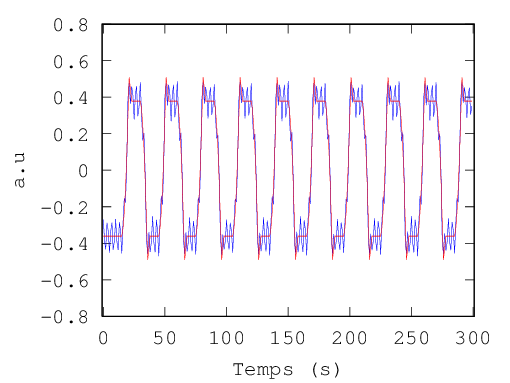

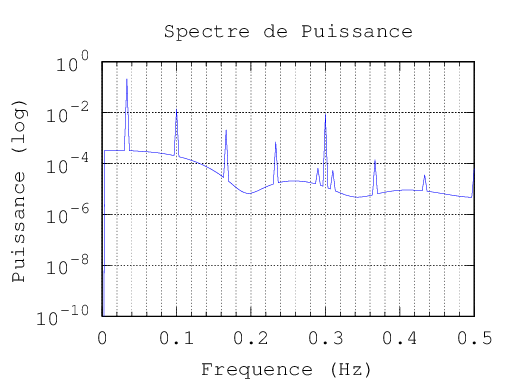

In [14]:
%%matlab

% Ce code n'est pas commenté, car essentiellement identique
% à ceux présentés en question 1.1. et 1.2.
% notez tout de même l'utilisation d'un hold on pour superposer la variable `signal` (sans bruit)
% au mélange de signaux.

y = y_sr;
% représentation en temps
figure
plot(ech,y)
hold on
plot(ech,signal,'r')
xlim([-1 301])
ylim([-0.8 0.8])
xlabel('Temps (s)')
ylabel('a.u')

% représentation en fréquence
figure
Analyse_Frequence_Puissance(y,ech);
ylim([10^(-10) 1])

On reconnait clairement la série de pics qui composent la variable `signal` auquelle vient se rajouter les fréquences de la variable `resp`, à 0.3 Hz. Notez que les spectres de puissance ne s'additionnent pas nécessairement, cela dépend si, à une fréquence donnée, les signaux que l'on additionne sont ou non en phase. 

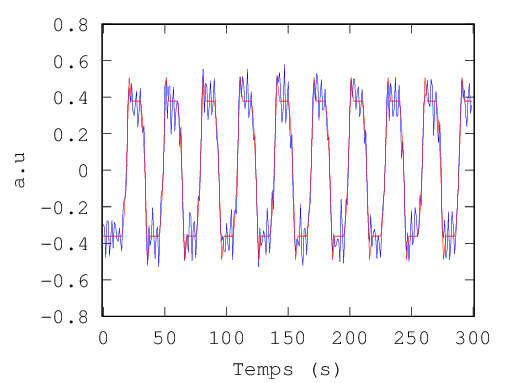

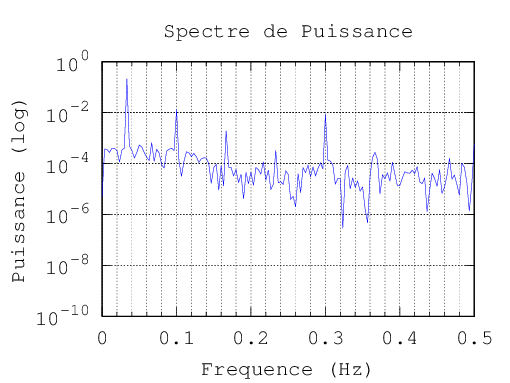

In [15]:
%%matlab

% Idem au code précédent, y_sr est remplacé par y_srb dans la ligne suivante.
y = y_srb;
% représentation en temps
figure
plot(ech,y)
hold on
plot(ech,signal,'r')
xlim([-1 301])
ylim([-0.8 0.8])
xlabel('Temps (s)')
ylabel('a.u')

% représentation en fréquence
figure
[freq_f,y_f,y_af,y_pu] = Analyse_Frequence_Puissance(y,ech);
ylim([10^(-10) 1])

L'addition du bruit blanc ajoute des variations aléatoires dans la totalité du spectre et, hormis les pics du spectre associé à `signal`, il devient difficile de distinguer la contribution de `resp`.

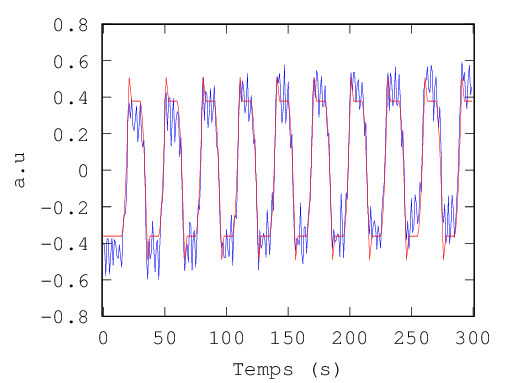

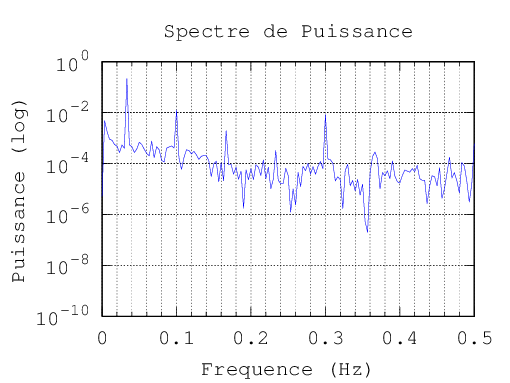

In [16]:
%%matlab
% Idem au code précédent, y_srb est remplacé par y_srbb dans la ligne suivante.
y = y_srbb;
% représentation en temps
figure
plot(ech,y)
hold on
plot(ech,signal,'r')
xlim([-1 301])
ylim([-0.8 0.8])
xlabel('Temps (s)')
ylabel('a.u')

% représentation en fréquence
figure
[freq_f,y_f,y_af,y_pu] = Analyse_Frequence_Puissance(y,ech);
ylim([10^(-10) 1])

### Section 2: Optimisation de filtre

#### 2.1. Nous allons commencer par appliquer un filtre de moyenne mobile, avec le signal le plus simple (`y_sr`).
Pour cela on crée un noyau et on applique une convolution, comme indiqué ci dessous.

In [18]:
%%matlab
%%définition d'un noyau de moyenne mobile
% taille de la fenêtre pour la moyenne mobile, en nombre d'échantillons temporels
taille = ceil(3*freq);
% le noyau, défini sur une fenêtre identique aux signaux précédents
noyau = [zeros(1,(length(signal)-taille-1)/2) ones(1,taille) zeros(1,(length(signal)-taille-1)/2)];
% normalisation du moyau
noyau = noyau/sum(abs(noyau));
% convolution avec le noyau (filtrage)
y_f = conv(y_sr,noyau,'same');

Représentez le noyau en fréquence (avec `Analyse_Frequence_Puissance`), commentez sur l'impact fréquentiel de la convolution. Faire un deuxième graphe représentant le signal d'intérêt superposé au signal filtré. 

err =  0.030706


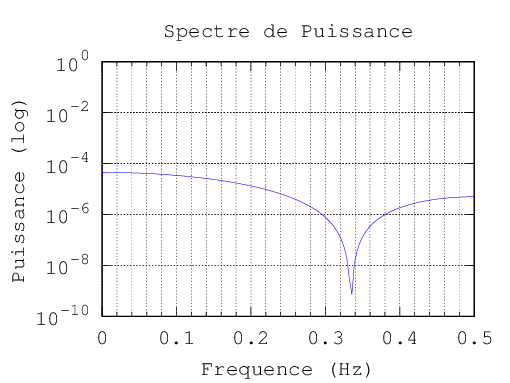

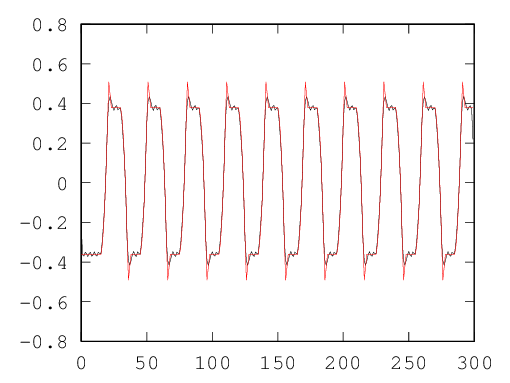

In [20]:
%%matlab

%% Représentation fréquentielle du filtre
figure
% représentation fréquentielle du noyau
Analyse_Frequence_Puissance(noyau,ech);
ylim([10^(-10) 1])

%% représentation du signal filtré
figure
% signal aprés filtrage
plot(ech,y_f,'k')
hold on
% signal sans bruit
plot(ech,signal,'r')

%% erreur résiduelle
err = sqrt(mean((signal-y_f).^2))

On voit que cette convolution supprime exactement la fréquence correspondant à la largeur du noyau (3 secondes). Il se trouve que cette fréquence est aussi trés proche de la fréquence respiratoire choisie! Visuellement, le signal filtré est très proche du signal original. La mesure d'erreur (tel que demandée dans la question 2.2. ci dessous est de 3%.

#### 2.2 Répétez la question 2.1 avec un noyau plus gros.
Commentez qualitativement sur la qualité du débruitage.

err =  0.076207


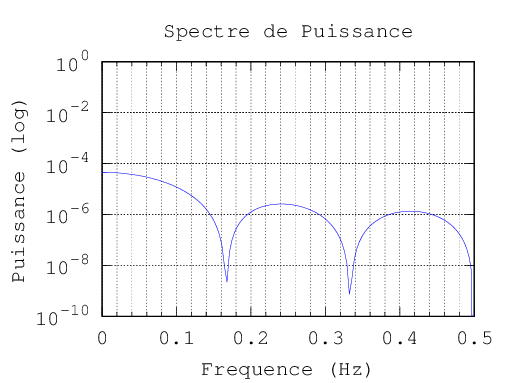

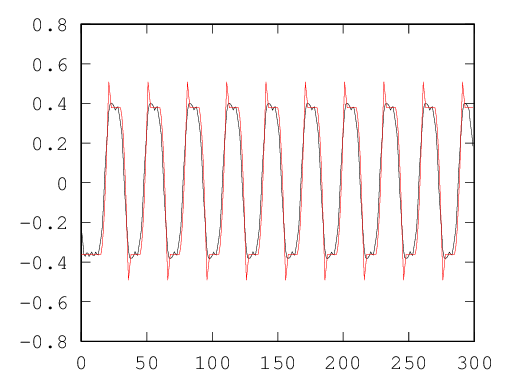

In [21]:
%%matlab

% taille de la fenêtre pour la moyenne mobile, en nombre d'échantillons temporels
% On passe de 3 à 7
% ATTENTION: sous matlab, ce code ne marche qu'avec des noyaux de taille impaire
taille = ceil(6*freq);
% le noyau, défini sur une fenêtre identique aux signaux précédents
noyau = [zeros(1,(length(signal)-taille-1)/2) ones(1,taille) zeros(1,(length(signal)-taille-1)/2)];
% normalisation du moyau
noyau = noyau/sum(abs(noyau));
% convolution avec le noyau (filtrage)
y_f = conv(y_sr,noyau,'same');

%% Représentation fréquentielle du filtre
figure
Analyse_Frequence_Puissance(noyau,ech);
ylim([10^(-10) 1])

%% représentation du signal filtré
figure
plot(ech,y_f,'k')
hold on
plot(ech,signal,'r')

%% erreur résiduelle
err = sqrt(mean((signal-y_f).^2))

On voit que ce noyau, en plus de supprimer une fréquence légèrement au dessus de 0.3 Hz, supprime aussi une fréquence proche de 0.16 Hz. C'était l'un des pics que l'on avait identifié dans le spectre de `signal`. De fait, dans la représentation temporelle, on voit que le signal filtré (en noir) est dégradé: les fluctuations rapides du signal rouge sont perdues. Et effectivement, on a maintenant une erreur résiduelle de 7.6%, supérieure au 3% du filtre précédent.

#### 2.3 Nous allons maintenant appliquer des filtres de Butterworth.
Ces filtres sont disponibles dans des fonctions que vous avez déjà utilisé lors du laboratoire sur la transformée de Fourier:
 - `FiltrePasseHaut.m`: suppression des basses fréquences.
 - `FiltrePasseBas.m`: suppression des hautes fréquences.
 
Le filtre de Butterworth n'utilise pas explicitement un noyau de convolution. Mais comme il s'agit d'un systéme linéaire invariant dans le temps, on peut toujours récupérer le noyau en regardant la réponse à une impulsion finie unitaire.

In [22]:
%%matlab

%% Définition d'une implusion finie unitaire
impulsion = zeros(size(signal));
impulsion(round(length(impulsion)/2))=1;
noyau = FiltrePasseHaut(impulsion,freq,0.1);

Représentez le noyau en temps et en fréquence. Quelle est la fréquence de coupure du filtre?

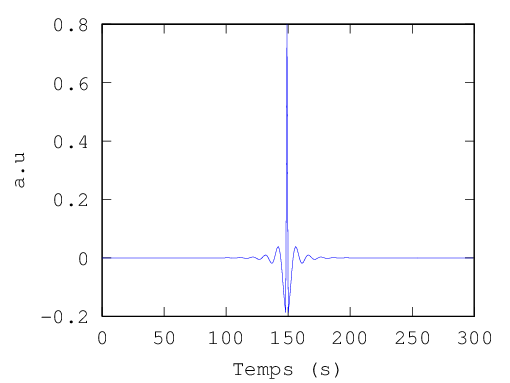

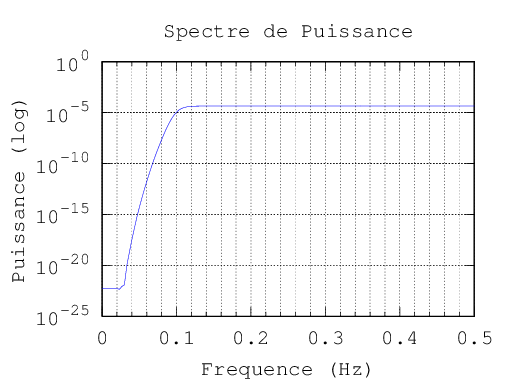

In [23]:
%%matlab

%% représentation temporelle
figure
plot(ech,noyau)
xlabel('Temps (s)')
ylabel('a.u')

%% représentation fréquentielle
figure
Analyse_Frequence_Puissance(noyau,ech);
set(gca,'yscale','log');

On observe une réduction importante de l'amplitude des fréquences inférieures à 0.1 Hz, qui correspond donc à la fréquence de coupure du filtre.

#### 2.4. Application du filtre de Butterworth.
L'exemple ci dessous filtre le signal avec un filtre passe bas, avec une fréquence de coupure de 0.1. Faire un graphe représentant le signal d'intérêt (`signal`) superposé au signal filtré. Calculez l'erreur résiduelle, et comparez au filtre par moyenne mobile évalué précédemment.

err =  0.061297


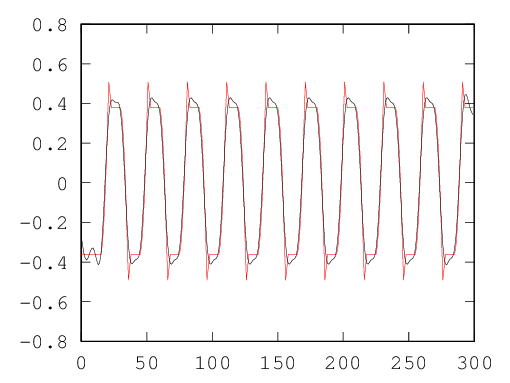

In [13]:
%%matlab
y = y_sr;
y_f = FiltrePasseBas(y,freq,0.1);

%%représentation du signal filtré
plot(ech,signal,'r')
hold on
plot(ech,y_f,'k')
err = sqrt(mean((signal-y_f).^2))

Avec une fréquence de coupure de 0.1 Hz, on perd de nombreux pics de `signal`, notamment celui situé à 0.16Hz. Effectivement dans la représentation en temps on voit que les variations rapides de `signal` sont perdues, et l'erreur résiduelle est de 6%. 

#### 2.5. Optimisation du filtre de Butterworth.
Trouvez une combinaison de filtre passe-haut et de filtre passe-bas de Butterworth qui permette d'améliorer l'erreur résiduelle par rapport au filtre de moyenne mobile. Faire un graphe représentant le signal d'intérêt (signal) superposé au signal filtré, et un second avec le signal d'intérêt superposé au signal bruité, pour référence.

err =  0.014540


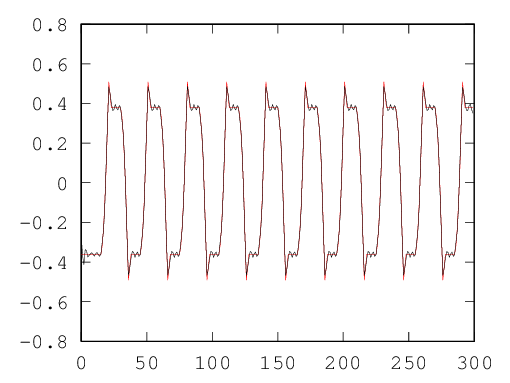

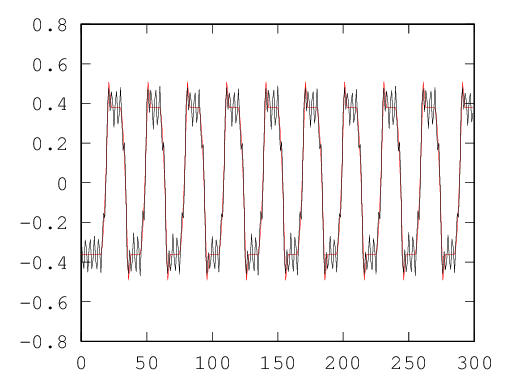

In [24]:
%%matlab
y = y_sr;

%% filtre de Butterworth
% on combine une passe-haut et un passe-bas, de maniére à retirer uniquement les fréquences autour de 0.3 Hz
y_f = FiltrePasseHaut(y,freq,0.35);
y_f = y_f+FiltrePasseBas(y,freq,0.25);

%% représentation du signal filtré
figure
plot(ech,signal,'r')
hold on
plot(ech,y_f,'k')
err = sqrt(mean((signal-y_f).^2))

%% représentation du signal brut
figure
plot(ech,signal,'r')
hold on
plot(ech,y,'k')

En combinant une filtre passe-haut et un passe-bas, de maniére à retirer uniquement les fréquences autour de 0.3 Hz, on peut restaurer le signal de maniére trés précise, et obtenir une erreur proche de 1%, meilleure que le 3% obtenu par moyenne mobile.